# Part I - San Francisco - Bay Area Bike Share
## by Jason Kannemeyer

## Introduction
> Bay Area Bike Share began in August 2013 and features a fleet of 700 bicycles and 70 stations along the San Francisco peninsula. Specially designed, durable bikes are locked into a network of docking stations and can be rented from and returned to any station in the system. The bike share system operates year-round, 24 hours a day, with stations in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose.

> Bike sharing allows Bay Area residents and visitors an additional, cost-effective transportation option. It offers many public health benefits, such as reducing the amount of harmful vehicle emissions released into the air. The program’s network is efficiently linked to public transit and numerous docking stations, providing many possible route combinations.

> Since January 1, 2016, the Metropolitan Transportation Commission has been in charge of overseeing the Bay Area Bike Share Program.

> My Analysis will focus on data from 2020 - 2022, 202205 dataset it gives errors and even with error checking The data is       still in a non readable format - All data from 201801-202003 is excluded since the dataset columns are not the same format     and number of columns

> **Uncommon Column names:**
* start_lat	= Start Latitude
* start_lng	= Start Longitude
* end_lat	= End Latitude
* end_lng   = End Longitude

> **Columns will be renamed to be more descriptive**
* rideable_type = Bike Types
* member_casual = Membership Types

> **Bike Share Data Source:**
* https://s3.amazonaws.com/baywheels-data/index.html
- The data from the datasource includes data from 2018, my analysis only takes data from 202004-202210 since all the columns     and data are in the same format, except for 202205 which is excluded from the analysis because it introduces errors when       merging the dataset with all the other datasets



## Preliminary Wrangling

#### 1. Importing Libraries and Modules

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline

#### 2. Loading Data
* Since I have multiple .csv files I need to merge/combine the csv files into one dataset to use in my wrangling efforts

In [ ]:
# importing all csv files to be merged/combined to create one file
# File bikeshare-csv-data/202112-baywheels-tripdata.csv.error will not be used, it contains too many errors that messes the df

all_files = glob.glob("bikeshare-csv-data/*.csv")

all_files_list = []

for filename in all_files:
    bikes_df = pd.read_csv(filename, index_col=None, header=0, sep=",")
    all_files_list.append(bikes_df)

bikes_df = pd.concat(all_files_list, axis=0, ignore_index=True)

bikes_df.to_csv("bikeshare-csv-data/merged_bikes.csv", index=False, encoding='utf-8')

In [2]:
merged_bikes = pd.read_csv("bikeshare-csv-data/merged_bikes.csv", sep=",", encoding="utf-8")

In [3]:
# Because .info() only gives a summary - datasize was too big, I had to use the additional 2 parameters to get the full expected output
# null_counts is deprecated in later version of pandas, the installed version on this workspace is lower then the preferred version that includes 
# the newer show_counts parameter
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
merged_bikes.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10653908 entries, 0 to 10653907
Data columns (total 13 columns):
ride_id               10653908 non-null object
rideable_type         10653908 non-null object
started_at            10653908 non-null object
ended_at              10653908 non-null object
start_station_name    8378524 non-null object
start_station_id      8375438 non-null object
end_station_name      8149152 non-null object
end_station_id        8146012 non-null object
start_lat             10653908 non-null float64
start_lng             10653908 non-null float64
end_lat               10641620 non-null float64
end_lng               10641620 non-null float64
member_casual         10653908 non-null object
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [4]:
merged_bikes.shape

(10653908, 13)

In [5]:
merged_bikes.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
6758660,4B46AACE7B749A32,electric_bike,2022-09-07 21:02:36,2022-09-07 21:21:15,Laguna St at Hayes St,SF-J21,NaN,NaN,37.776199,-122.426339,37.760000,-122.400000,casual
30310,A85F48B4A366D50C,electric_bike,2021-05-31 07:38:23,2021-05-31 08:23:29,Washington St at Kearny St,SF-D27,NaN,NaN,37.795304,-122.404477,37.810000,-122.440000,member
9912072,FEA2D2F13CBD151C,electric_bike,2020-11-29 17:23:57,2020-11-29 17:36:38,NaN,NaN,NaN,NaN,37.330000,-121.900000,37.330000,-121.890000,member
10577304,7D200DBD67F7520A,electric_bike,2022-10-13 11:39:15,2022-10-13 11:42:11,NaN,NaN,NaN,NaN,37.790000,-122.400000,37.790000,-122.400000,member
9532005,B6F84456D36D0028,electric_bike,2021-06-29 18:40:30,2021-06-29 18:52:37,NaN,NaN,Market St at 10th St,SF-J23-1,37.770000,-122.450000,37.776751,-122.417254,casual


In [6]:
merged_bikes.isna().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    2275384
start_station_id      2278470
end_station_name      2504756
end_station_id        2507896
start_lat                   0
start_lng                   0
end_lat                 12288
end_lng                 12288
member_casual               0
dtype: int64

In [7]:
merged_bikes[merged_bikes.isna().any(axis=1)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0CFA23F5E7AB673F,electric_bike,2021-05-26 19:00:56,2021-05-26 19:07:47,NaN,NaN,NaN,NaN,37.77,-122.43,37.760000,-122.420000,member
1,B668EA9AE8060173,electric_bike,2021-05-26 20:44:06,2021-05-26 20:49:44,NaN,NaN,NaN,NaN,37.76,-122.42,37.760000,-122.420000,member
2,5E2FCA574C224339,electric_bike,2021-05-11 17:41:55,2021-05-11 17:42:54,NaN,NaN,NaN,NaN,37.34,-121.90,37.340000,-121.900000,member
3,62969D5D15B9DB49,electric_bike,2021-05-11 20:59:55,2021-05-11 20:59:59,NaN,NaN,NaN,NaN,37.34,-121.90,37.340000,-121.900000,member
4,4CE01FBCFC520EC2,electric_bike,2021-05-11 20:38:58,2021-05-11 20:59:33,NaN,NaN,NaN,NaN,37.34,-121.88,37.340000,-121.900000,member
5,EA4F8C621B6C4C40,electric_bike,2021-05-11 17:44:49,2021-05-11 17:55:22,NaN,NaN,NaN,NaN,37.34,-121.90,37.340000,-121.880000,member
6,F950941BCED865D4,electric_bike,2021-05-19 19:36:28,2021-05-19 20:10:14,NaN,NaN,NaN,NaN,37.34,-121.90,37.340000,-121.900000,member
7,C437105BA17BF27B,electric_bike,2021-05-12 18:30:49,2021-05-12 18:31:23,NaN,NaN,NaN,NaN,37.76,-122.43,37.760000,-122.430000,member
8,87C8D563410DAC2A,electric_bike,2021-05-12 18:36:54,2021-05-12 18:40:43,NaN,NaN,NaN,NaN,37.76,-122.43,37.760000,-122.430000,member
9,0A8FF7D4ADD1B6BC,electric_bike,2021-05-12 18:32:56,2021-05-12 18:33:54,NaN,NaN,NaN,NaN,37.76,-122.43,37.760000,-122.430000,member


* Seems that all of the NaN values in the dataset associated with the **"start_station_name, start_station_id, end_station_name, end_station_id, end_lat and end_lng"** is because the longitude and latitude values were not captured correctly, the number of rows with NaN values is 3476924, meaning 34% data consists of NaN values

In [8]:
# I will drop the NaN values to make the data set cleaner and since the impact will be minimal, 
# the average data loss from the dropped rows is around 20%
# https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

print(1738462/5326954)
print(1130645/5286428)
print(1243355/5286428)
print(1244261/5286428)

0.32635198276538524
0.2138769316445812
0.23519756629618335
0.23536894856035115


#### 3. Cleaning data

In [9]:
# Dropping Nan Values - explanation is found on top cell
# After the columns are dropped it wont restart the index from 0, instead it will continue with the old index that is why the reset_index function is used
merged_bikes.dropna(how='any', inplace=True)
merged_bikes.reset_index(drop=True, inplace=True)

> **how** = Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.
* _**'any'**_ : If any NA values are present, drop that row or column.
* _**'all'**_ : If all values are NA, drop that row or column.

In [10]:
# Convert the date tables from object(string/object) to datetime64
merged_bikes['started_at']= pd.to_datetime(merged_bikes['started_at'])
merged_bikes['ended_at']= pd.to_datetime(merged_bikes['ended_at'])
# create additional table to determine how long a trip lasted
merged_bikes['duration'] = (merged_bikes['ended_at'] - merged_bikes['started_at'])
#create new columns that splits converts timedelta into total number of minutes
merged_bikes['duration'] = merged_bikes['duration'] / pd.Timedelta(minutes=1)
merged_bikes['hour'] = merged_bikes['started_at'].dt.hour
merged_bikes['week_day'] = merged_bikes['started_at'].dt.day_name()
merged_bikes['month'] = merged_bikes['started_at'].dt.month_name()

merged_bikes['duration'] = merged_bikes['duration'].astype(int)
# rename columns to more readable column names
merged_bikes.rename(columns = {'rideable_type':'bike_type'}, inplace = True)
merged_bikes.rename(columns = {'member_casual':'membership_type'}, inplace = True)

In [11]:
# Because .info() only gives a summary - datasize was too big, I had to use the additional 2 parameters to get the full expected output
# null_counts is deprecated in later version of pandas, the installed version on this workspace is lower then the preferred version that includes 
# the newer show_counts parameter
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
merged_bikes.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176984 entries, 0 to 7176983
Data columns (total 17 columns):
ride_id               7176984 non-null object
bike_type             7176984 non-null object
started_at            7176984 non-null datetime64[ns]
ended_at              7176984 non-null datetime64[ns]
start_station_name    7176984 non-null object
start_station_id      7176984 non-null object
end_station_name      7176984 non-null object
end_station_id        7176984 non-null object
start_lat             7176984 non-null float64
start_lng             7176984 non-null float64
end_lat               7176984 non-null float64
end_lng               7176984 non-null float64
membership_type       7176984 non-null object
duration              7176984 non-null int64
hour                  7176984 non-null int64
week_day              7176984 non-null object
month                 7176984 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(9)
memory usage: 930.9+ MB


In [12]:
merged_bikes.shape

(7176984, 17)

In [13]:
merged_bikes.isna().sum()

ride_id               0
bike_type             0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
membership_type       0
duration              0
hour                  0
week_day              0
month                 0
dtype: int64

In [14]:
merged_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176984 entries, 0 to 7176983
Data columns (total 17 columns):
ride_id               object
bike_type             object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name    object
start_station_id      object
end_station_name      object
end_station_id        object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
membership_type       object
duration              int64
hour                  int64
week_day              object
month                 object
dtypes: datetime64[ns](2), float64(4), int64(2), object(9)
memory usage: 930.9+ MB


In [15]:
# labels to use in plots
month_labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
weekday_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# color to use in plots 
default_color = sns.color_palette()[0]

### What is the structure of your dataset?

> The initially merged dataset consists of (10653908 Rows and 13 Columns) , After dropping NaN values the dataset consists of (7176984 Rows and 17 Columns) - 3 columns were added to be used for analysis

### What is/are the main feature(s) of interest in your dataset?

> Trip durations?
> Months/Weeks What is the average duration of trips, by members and bike types?
> In my investigation I want to look at what featres time of the day, day of the week and month were most trips taken?

Rides seems to be higher during the normal morning traffic rush hours, and flattens during the day but picks up again later at night when people return from work.
Casual drivers seems to last longer then that of members, even though the number of members are more than that of casual drivers
I also found that the number of bikes does not necesarily mean the durations will be longer, because what I saw from the comparison between the types of bikes - even though Docked bikes only accounts for about 10% of the total bikes, but their trip durations are higher then that of the bikes with higher numbers
From the data that I used you can see that people tend to use the service more on Saturday and Friday, and October seems to be the time when more trips are recorded then any other month - could be because of tourists traveling more to the bay area in October.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### What is the number of bike types available for casual/member use?

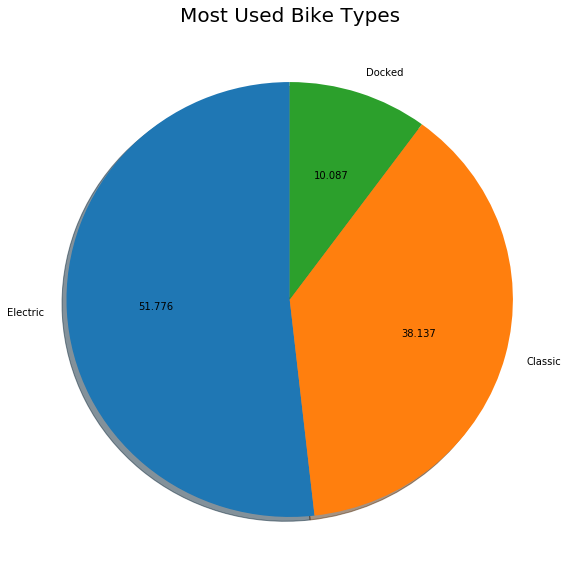

In [16]:
plt.figure(figsize=(10,10))
plt.pie(merged_bikes['bike_type'].value_counts(),startangle=90,autopct='%.3f',labels=['Electric', 'Classic', 'Docked'],shadow=True)
plt.title('Most Used Bike Types', fontsize=20)
plt.show();

> You can see that docked bikes accounts for only 10.087%, but in graphs to follow you will actually see that they are used for longer durations then your other bikes, so it always makes sense to dig deeper before making decisions about features

#### What membership types are available and how do they compare to each other?

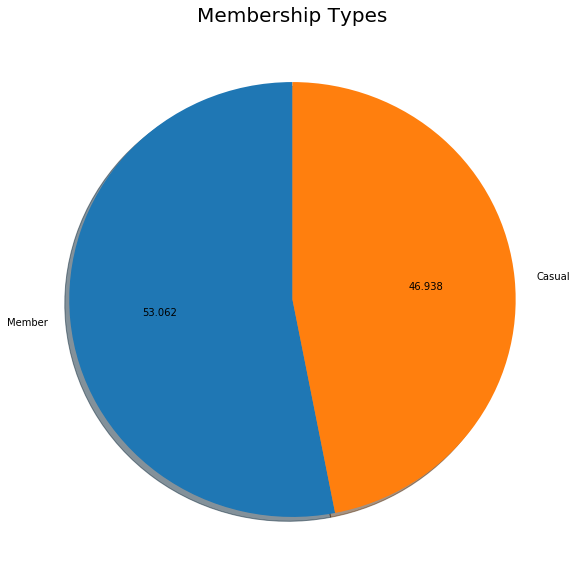

In [17]:
plt.figure(figsize=(10,10))
plt.pie(merged_bikes['membership_type'].value_counts(),startangle=90,autopct='%.3f',labels=['Member', 'Casual'],shadow=True)
plt.title('Membership Types', fontsize=20)
plt.show;

> From the above graph you can see that there are more members than casual users, the difference is about 7% between the 2 groups, but interestingly as we progress we will see that even though there are more members the casual drivers average duration is more then that of the members.

#### Which months are the most busiests?

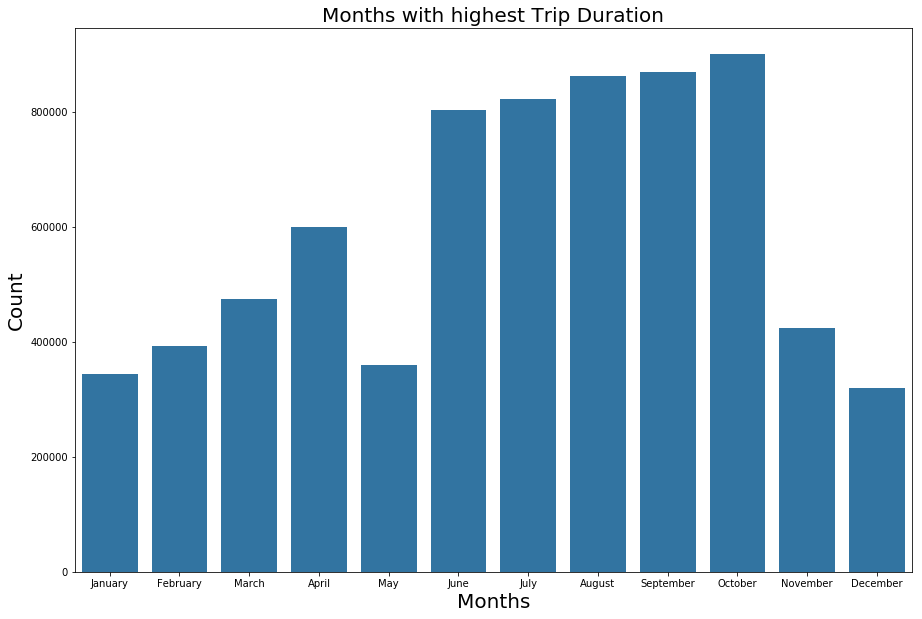

In [32]:
fig, ax = plt.subplots(figsize = [15,10])
sns.countplot(x=merged_bikes['month'],
                   order=month_labels, color=default_color).set_title('Months with highest Trip Duration', fontsize=20)
plt.xlabel("Months",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show();

> It seems that during the winter months Dec, Jan and May less people make use of the service as oppossed to the summer months June-Sept. October seems to be the clear winner, one of the reasons seems to be tourists and events taking place that month
* https://www.holidify.com/pages/san-francisco-in-october-5283.html

#### Which hours of the day are the busiest?

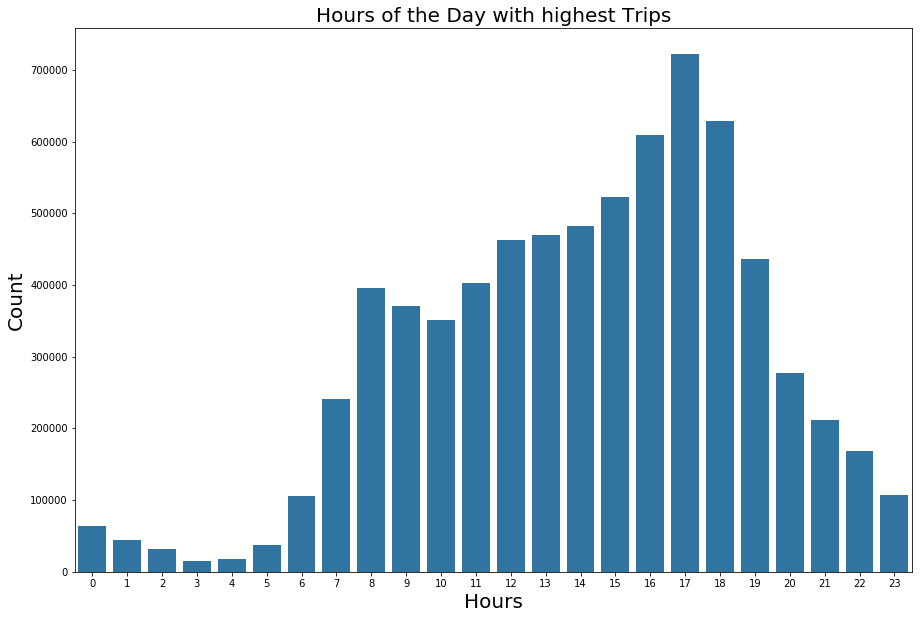

In [33]:
fig, ax = plt.subplots(figsize = [15,10])
sns.countplot(x=merged_bikes['hour'],
              color=default_color, order=merged_bikes['hour'].value_counts(ascending=False, sort=False).index).set_title('Hours of the Day with highest Trips', fontsize=20)
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show();

> We can observe that the 16:00, 17:00, 18:00 have the highest start times, it caould also indicate the end of a work day, or the times when functions start - then if we look at 08:00, 09:00 and possibly 10:00 could be times when people start work, then its also good to note the midnight hours, could be outliers but could also be when events end - maybe halloween if we can go on the data for October.

#### Which days of the week are the busiest?

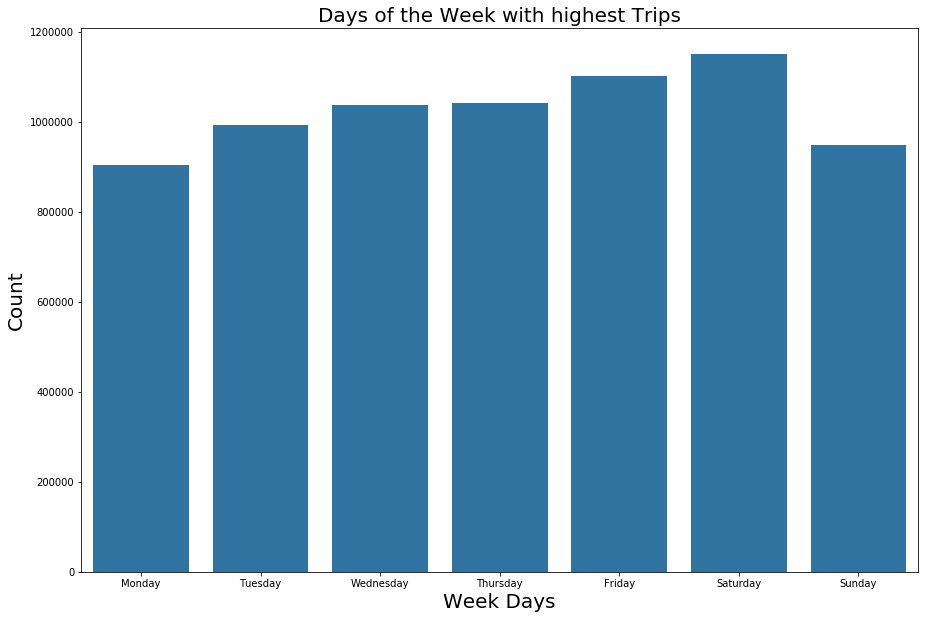

In [34]:
fig, ax = plt.subplots(figsize = [15,10])
sns.countplot(x=merged_bikes['week_day'],
                   order=weekday_labels, color=default_color).set_title('Days of the Week with highest Trips', fontsize=20)
plt.xlabel("Week Days",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show();

> From the data that I used you can see that people tend to use the service more on Saturday and Friday, which you can almost say is expected since more people prefer to not be in the bustling city, but rather take a seaside bike ride or attend events with bikes with friends and family.

#### What are the 10 most Popular Starting Stations?

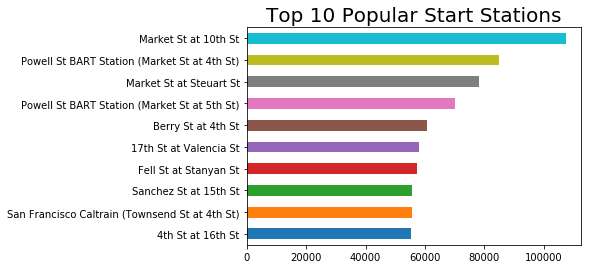

In [21]:
plt.title('Top 10 Popular Start Stations', fontsize=20)
merged_bikes['start_station_name'].value_counts(ascending=True).tail(10).plot.barh();

#### What are the 10 most Popular Starting Stations?

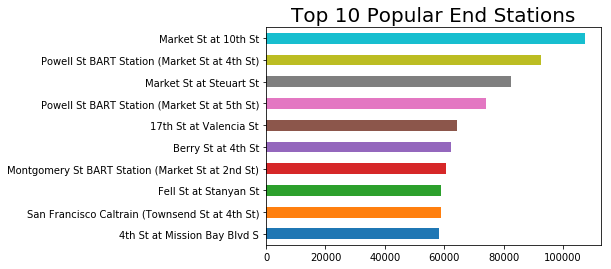

In [22]:
plt.title('Top 10 Popular End Stations', fontsize=20)
merged_bikes['end_station_name'].value_counts(ascending=True).tail(10).plot.barh();

> Looking at the above 2 bar-graphs you can see that some of the stations are the same meaning trips can start at a station and also end at the same station, I still need to investigate how it affects the duration of those trips compared to trips to other stations - there have been an instances where I noticed 1 trip was 610 minutes long - could be an outlier or someone legit rented a bike for 10 hours

#### What number of trips have the same start and end destination?

In [23]:
(merged_bikes['start_station_id'] == merged_bikes['end_station_id']).value_counts()

False    6635022
True      541962
dtype: int64

> From the cleaned dataset which contains 7176984 Rows only 541962 Rows had the same start and end destination - or about 7.55% of all trips ends at the same station it started.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The only transformations that I did was to work out the duration between trips and also extract the wek days and months from the start dates - assuming that a month does not span over multiple days it is safe to assume that trips on average takes 30-40 mins wiith outliers of of 240-610 hours, but it only acounts for 3% of the data, so it is not too signifigant to skew the numbers of the other values.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Does number of available bike types influence the duration of a trip?

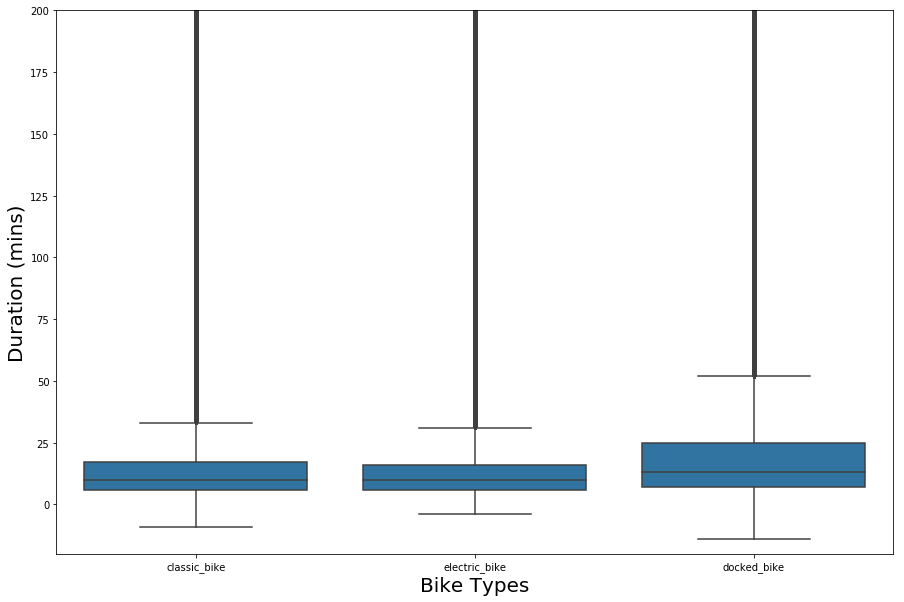

In [25]:
plt.figure(figsize = [15, 10])
sns.boxplot(data = merged_bikes, x = 'bike_type', y = 'duration', color = default_color)
plt.ylim([-20, 200])
plt.xlabel('Bike Types', fontsize=20)
plt.ylabel('Duration (mins)', fontsize=20)
plt.show()

> We can see that even thought docked bikes have the lowest number of available bikes ~10% it on avarage has the longest trip durations of all the other bikes. 

#### Does having a higher membership number influence the average duration per trip?

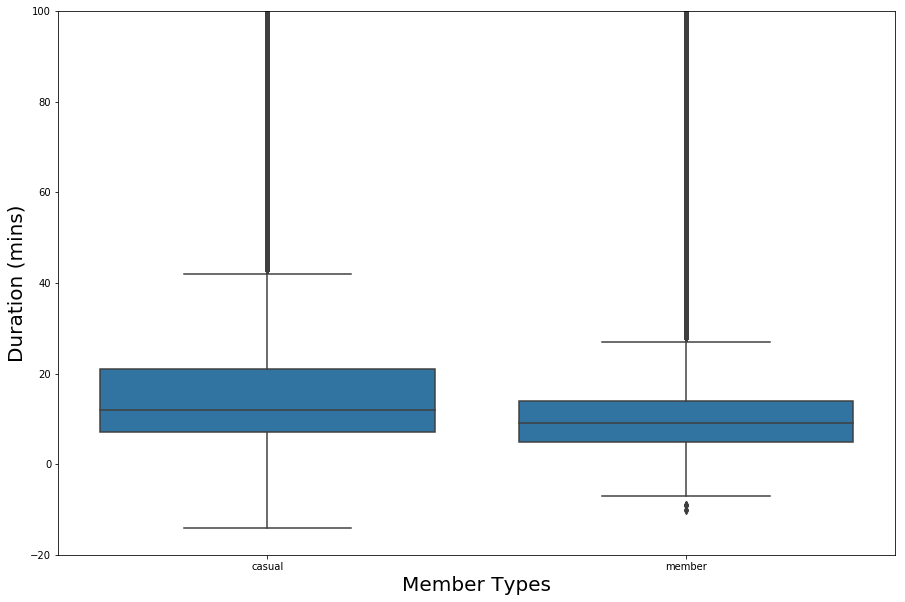

In [26]:
plt.figure(figsize = [15, 10])
sns.boxplot(data = merged_bikes, x = 'membership_type', y = 'duration', color = default_color)
plt.ylim([-20, 100])
plt.xlabel('Member Types', fontsize=20)
plt.ylabel('Duration (mins)', fontsize=20)
plt.show();

> From previos charts we saw that there were more members then casual users, but in the above plot we see that casual users uses the service for a longer period of time.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the above graphs you can see that the number of casual drivers uses the the service for a longer periods than the members, from the pie charts charts you can see that there are more members than casual users, what is also surprising is that even though docked bikes accounts for only 10% of the total bikes, it also accounts for more hours being used then the other bikes available

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Even though the numbers one group is smaller then the next we should take into account all variales and account for features that we should investigate further - we see that docked bikes are the smallest amounts of bike, but also the bikes with the highest average duration, so we need to ask why that is, and find that electric bikes are not alwyays feasible in terms of seasons, if it rain or snow, electric bikes will be more susceptible to the weather. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### What bike type has the highest average useage during the week?

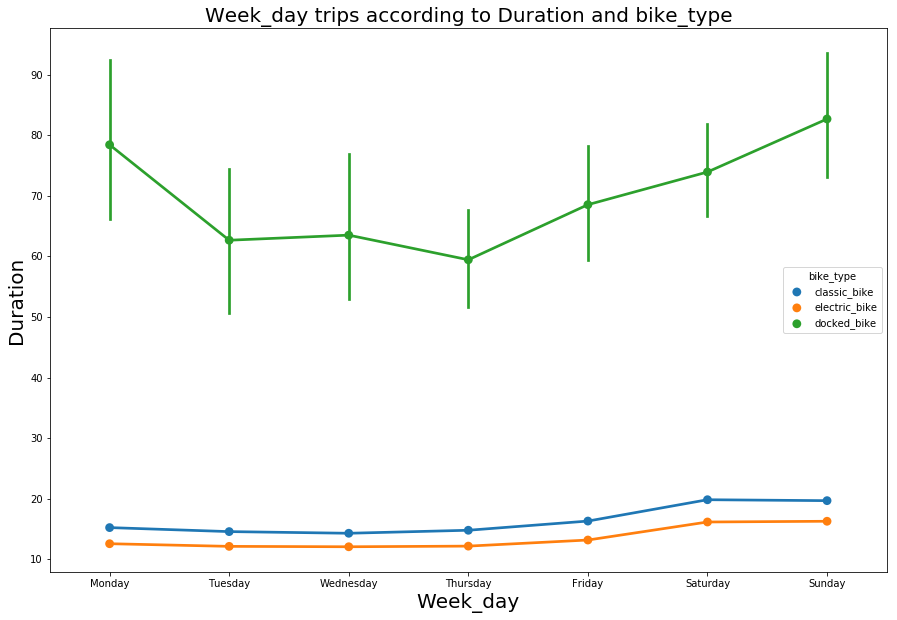

In [41]:
#https://www.tutorialspoint.com/how-to-have-a-function-return-a-figure-in-python-using-matplotlib

#function to reuse scatterplot

def pointplot(x,y,hue,order):
    df=merged_bikes
    fig=plt.figure(figsize = (15,10))
    plot=sns.pointplot(y=y,x=x,hue=hue,data=merged_bikes,order=order)
    title=plt.title ("{} trips according to {} and {}".format(x.capitalize(),y.capitalize(), hue), fontsize=20) #.capitalize makes the first letter a capital letter
    ylabel=plt.ylabel("{}".format(y).capitalize(), fontsize=20)
    xlabel=plt.xlabel("{}".format(x).capitalize(), fontsize=20)
    return df,fig,plot,title,ylabel,xlabel

pointplot("week_day","duration", "bike_type", weekday_labels)
plt.show();

> If we look at the above plot we clearly see that docked bikes are a favorite to use, the average for the above docked bikes are higher compared to your averages for the other 2 bike types - even though they clearly have more bikes available

#### Which membership group uses the service more during the week?

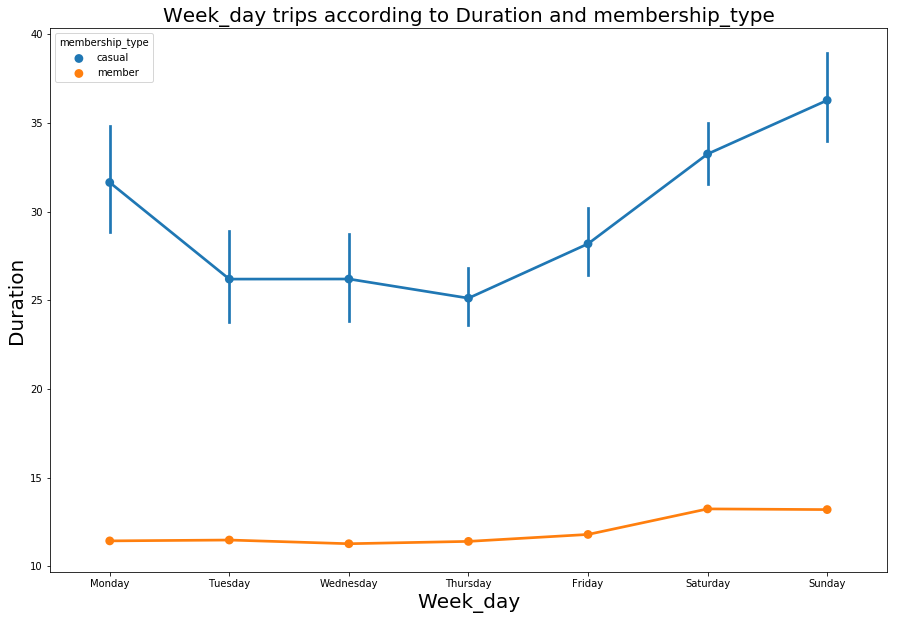

In [42]:
pointplot("week_day","duration","membership_type", weekday_labels)
plt.show();

> If we look at the above plot we clearly see that casual users uses the service more then actual members - even though there are more members registered - it could also be an indication of influx of employees to San Francisco because of the technology companies there

#### What bike type service has the highest average useage during the month?

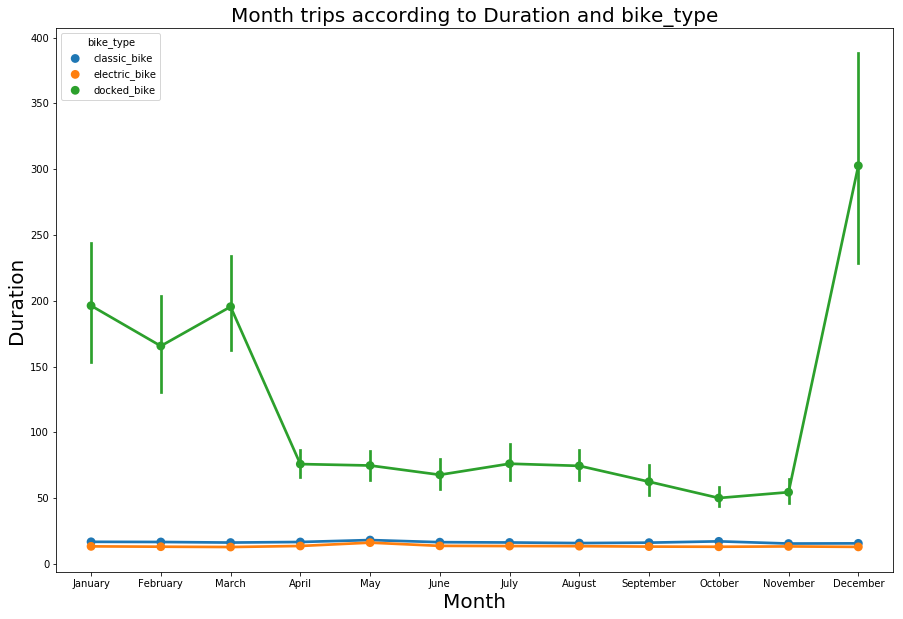

In [43]:
pointplot("month","duration","bike_type", month_labels)
plt.show();

> We can see that docked bikes are still the most prefered bike choice - When we look at December we see that its average trip duration is 300 mins - which can either mean people took longer trip with the bikes or simply some sort of outliers that is causing the average to be this high

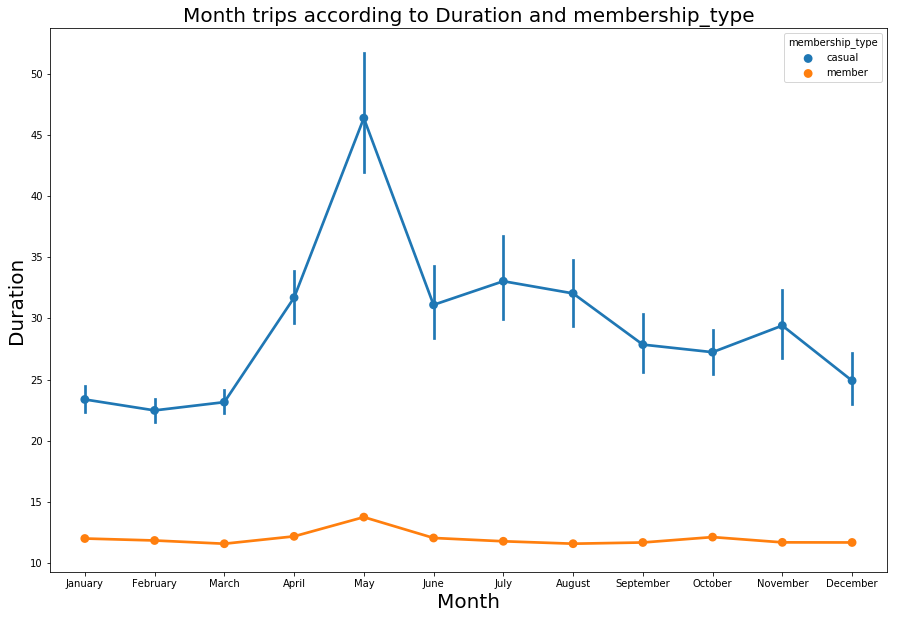

In [45]:
pointplot("month","duration","membership_type", month_labels)
plt.show();

> From the above graph we see that casual users uses the service more then registered members, we also notices in May the average trip duration was about 45 mins.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the previos graphs it was confirmed that without looking at the previous graphs/charts, no conclusion can be drawn to a single variable, without looking deeper into other variables that might give more insigts, so it's worth taking into account more features/variables then the ones you investigate.

### Were there any interesting or surprising interactions between features?

> The trip duration spent by the casual users, I found was longer then the members.

## Conclusions
>After analysing the dataset which covers the years 202004 - 202210, the following conclusions were drawn.

1. The top 10 most used stations also consisted of the top 4 end and start destinations and a 7% chance that those are the same stations members and subscribers take. 
2. The majority of trips were taken on Saturdays and Fridays, Mondays are the days when the numbers are actually the lowest. So the assumption remains true that weekends generate on average more income then weekdays
3. The peak hours are when comuunters(members/casual users)go to work in the morning (8:00 and 9:00 and 10:00) and closing in the evening (17:00, 18:00, and 19:00), these both are expected times if you look at times when people go to work and return.
4. There are more Members then casual users users, but members accounted for less then the casual user avarage trip durations.
5. The number of trips per weekday is not affected by members type.
6. When compared to members, casual users traveled for longer periods of time regardless of the day of the week.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

